# SampleCUDA Weak Scaling Anaylisis

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("/scratch/user/vlobello/CSCE_435/SampleSort_Cuda/starter/*.cali"))
tk.dataframe = tk.dataframe.drop(["spot.channel"], axis=1)
tk.dataframe = tk.dataframe.drop(["Min time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Max time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Avg time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Total time"],axis=1)
tk.dataframe = tk.dataframe.drop(["Min GPU time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Max GPU time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Total GPU time"],axis=1)
tk.dataframe = tk.dataframe.drop(["nid"],axis=1)

In [3]:
# Performance data
tk.dataframe

Avg GPU time/rank  \
node                                               profile                         
{'name': 'main', 'type': 'function'}               17451               82.393897   
                                                   17008306             0.031667   
                                                   61946710             3.607932   
                                                   65126534            74.323355   
                                                   81007199             0.052653   
                                                   89241719            56.154306   
                                                   198473597           57.145904   
                                                   224750785           18.075946   
                                                   239995513           56.128430   
                                                   290226507          277.782642   
                                                   304566023            1.101938   
                                                   324781613            4.579774   
                                                   357147679           17.829453   
                                                   405727584            1.606549   
                                                   515978529            2.265043   
                                                   516575128           55.841874   
                                                   550537028            0.892425   
                                                   569813605            0.021453   
                                                   588729148           33.121372   
                                                   624416312          384.710806   
                                                   627390968           71.938094   
                                                   651129197           61.536271   
                                                   710974161            0.083618   
                                                   724188897           20.151647   
                                                   752918258         4989.187658   
                                                   766261525            0.200112   
                                                   766746404           14.033665   
                                                   769648250           16.723491   
                                                   818446829         4324.353743   
                                                   867768999            0.363483   
                                                   869243659           16.763410   
                                                   903097682            0.882661   
                                                   932761189            0.311036   
                                                   943430283           55.522198   
                                                   944471155           57.167672   
                                                   946518831            0.068477   
                                                   1027826668        2334.813271   
                                                   1139362358          23.551028   
                                                   1147262377           0.021327   
                                                   1163948790           3.656302   
                                                   1178563523           0.066968   
                                                   1217588312           1.369783   
                                                   1349812578        2177.378943   
                                                   1353430148           0.258114   
                                                   1363531558           0.223192   
                                                   1395628141           0.016398   
                               

In [4]:
#Printing Thicket Tree
tk.statsframe.dataframe["time"] = 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 comm_large
│  │  └─ 1.000 cudaMemcpy
│  └─ 1.000 comm_small
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check 
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [5]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
17451,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,v4194304-t256-i0.cali,1701412675,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 4194304, 256, 0]",g,SampleSort,CUDA,int,4,4194304,Random,256,16384,9,Online
17008306,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,v65536-t512-i3.cali,1701412402,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 65536, 512, 3]",g,SampleSort,CUDA,int,4,65536,1%%pertubed,512,128,9,Online
61946710,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,v16777216-t512-i3.cali,1701412797,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 16777216, 512, 3]",g,SampleSort,CUDA,int,4,16777216,1%%pertubed,512,32768,9,Online
65126534,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,v1048576-t64-i0.cali,1701412554,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 1048576, 64, 0]",g,SampleSort,CUDA,int,4,1048576,Random,64,16384,9,Online
81007199,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,v65536-t1024-i3.cali,1701554799,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 65536, 1024, 3]",g,SampleSort,CUDA,int,4,65536,1%%pertubed,1024,64,9,Online
89241719,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,v268435456-t256-i3.cali,1701413014,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 268435456, 256, 3]",g,SampleSort,CUDA,int,4,268435456,1%%pertubed,256,1048576,9,Online
198473597,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,v268435456-t512-i3.cali,1701413044,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 268435456, 512, 3]",g,SampleSort,CUDA,int,4,268435456,1%%pertubed,512,524288,9,Online
224750785,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,v67108864-t1024-i1.cali,1701557120,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 67108864, 1024, 1]",g,SampleSort,CUDA,int,4,67108864,Sorted,1024,65536,9,Online
239995513,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,v268435456-t256-i1.cali,1701413003,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 268435456, 256, 1]",g,SampleSort,CUDA,int,4,268435456,Sorted,256,1048576,9,Online


In [6]:
gb = tk.groupby(["InputType", "InputSize"])

26  thickets created...
{('1%%pertubed', 65536): <thicket.thicket.Thicket object at 0x2b9f252c0580>, ('1%%pertubed', 262144): <thicket.thicket.Thicket object at 0x2b9f25320760>, ('1%%pertubed', 1048576): <thicket.thicket.Thicket object at 0x2b9f25226b80>, ('1%%pertubed', 4194304): <thicket.thicket.Thicket object at 0x2b9f25235c40>, ('1%%pertubed', 16777216): <thicket.thicket.Thicket object at 0x2b9f252dffd0>, ('1%%pertubed', 67108864): <thicket.thicket.Thicket object at 0x2b9f25485ee0>, ('1%%pertubed', 268435456): <thicket.thicket.Thicket object at 0x2b9f25250310>, ('Random', 65536): <thicket.thicket.Thicket object at 0x2b9f25283a90>, ('Random', 262144): <thicket.thicket.Thicket object at 0x2b9f2529b100>, ('Random', 1048576): <thicket.thicket.Thicket object at 0x2b9f25241d30>, ('Random', 4194304): <thicket.thicket.Thicket object at 0x2b9f252958e0>, ('Random', 16777216): <thicket.thicket.Thicket object at 0x2b9f25361eb0>, ('Random', 67108864): <thicket.thicket.Thicket object at 0x2b9f25

Compose these 3 groups column-wise to get a holistic view of the data

In [7]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [8]:
ctk.dataframe

(1%%pertubed, 65536)  \
                                                                  Avg GPU time/rank   
node                                               num_threads                        
{'name': 'main', 'type': 'function'}               64                      0.011542   
                                                   128                     0.021453   
                                                   256                     0.023280   
                                                   265                          NaN   
                                                   512                     0.031667   
                                                   1024                    0.052653   
{'name': 'comm', 'type': 'function'}               64                      0.000022   
                                                   128                     0.000024   
                                                   256                     0.000024   
                                                   265                          NaN   
                                                   512                     0.000025   
                                                   1024                    0.000024   
{'name': 'comm_large', 'type': 'function'}         64                      0.000022   
                                                   128                     0.000024   
                                                   256                     0.000024   
                                                   265                          NaN   
                                                   512                     0.000025   
                                                   1024                    0.000024   
{'name': 'cudaMemcpy', 'type': 'function'}         64                      0.000022   
                                                   128                     0.000024   
                                                   256                     0.000024   
                                                   265                          NaN   
                                                   512                     0.000025   
                                                   1024                    0.000024   
{'name': 'comm_small', 'type': 'function'}         64                           NaN   
                                                   128                          NaN   
                                                   256                          NaN   
                                                   265                          NaN   
                                                   512                          NaN   
                                                   1024                         NaN   
{'name': 'comp', 'type': 'function'}               64                      0.011505   
                                                   128                     0.021408   
                                                   256                     0.023235   
                                                   265                          NaN   
                                                   512                     0.031621   
                                                   1024                    0.052611   
{'name': 'comp_large', 'type': 'function'}         64                      0.006710   
                                                   128                     0.012172   
                                                   256                     0.011937   
                                                   265                          NaN   
                                                   512                     0.012787   
                                                   1024                    0.014261   
{'name': 'comp_small', 'type': 'function'}         64                      0.004794   
                                                   128       

Perform pandas operations to get the table in a desirable format for plotting

In [9]:
# Drop unwanted columns
#ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (("1%%perturbed",65536), "nid"), (("1%%perturbed",65536),"Min time/rank"), (("1%%perturbed",65536),"Max time/rank"), (("1%%perturbed",65536),"Total time"), (("1%%perturbed",65536),"Variance time/rank"), (("Random",65536),"nid"), (("Random",65536),"Min time/rank"), (("Random",65536),"Max time/rank"), (("Random",65536),"Total time"), (("Random",65536),"Variance time/rank"),(("Sorted",65536),"nid"),(("Sorted",65536),"Min time/rank"), (("Sorted",65536),"Max time/rank"), (("Sorted",65536),"Total time"), (("Sorted",65536),"Variance time/rank"),(("ReverseSorted",65536),"nid"),(("ReverseSorted",65536),"Min time/rank"), (("ReverseSorted",65536),"Max time/rank"), (("ReverseSorted",65536),"Total time"), (("ReverseSorted",65536),"Variance time/rank") ], axis=1)
#ctk.dataframe = ctk.dataframe.reset_index().drop([(("1%%perturbed",262144), "nid"), (("1%%perturbed",262144),"Min time/rank"), (("1%%perturbed",262144),"Max time/rank"), (("1%%perturbed",262144),"Total time"), (("1%%perturbed",262144),"Variance time/rank"), (("Random",262144),"nid"), (("Random",262144),"Min time/rank"), (("Random",262144),"Max time/rank"), (("Random",262144),"Total time"), (("Random",262144),"Variance time/rank"),(("Sorted",262144),"nid"),(("Sorted",262144),"Min time/rank"), (("Sorted",262144),"Max time/rank"), (("Sorted",262144),"Total time"), (("Sorted",262144),"Variance time/rank"),(("ReverseSorted",262144),"nid"),(("ReverseSorted",262144),"Min time/rank"), (("ReverseSorted",262144),"Max time/rank"), (("ReverseSorted",262144),"Total time"), (("ReverseSorted",262144),"Variance time/rank") ], axis=1)
#ctk.dataframe = ctk.dataframe.reset_index().drop([(("1%%perturbed",1048576), "nid"), (("1%%perturbed",1048576),"Min time/rank"), (("1%%perturbed",1048576),"Max time/rank"), (("1%%perturbed",1048576),"Total time"), (("1%%perturbed",1048576),"Variance time/rank"), (("Random",1048576),"nid"), (("Random",1048576),"Min time/rank"), (("Random",1048576),"Max time/rank"), (("Random",1048576),"Total time"), (("Random",1048576),"Variance time/rank"),(("Sorted",1048576),"nid"),(("Sorted",1048576),"Min time/rank"), (("Sorted",1048576),"Max time/rank"), (("Sorted",1048576),"Total time"), (("Sorted",1048576),"Variance time/rank"),(("ReverseSorted",1048576),"nid"),(("ReverseSorted",1048576),"Min time/rank"), (("ReverseSorted",1048576),"Max time/rank"), (("ReverseSorted",1048576),"Total time"), (("ReverseSorted",1048576),"Variance time/rank") ], axis=1)
#ctk.dataframe = ctk.dataframe.drop([("index","")], axis=1)

ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [10]:
ctk.dataframe

(1%%pertubed, 65536) (1%%pertubed, 262144)  \
                                  Avg GPU time/rank     Avg GPU time/rank   
name               num_threads                                              
main               64                      0.011542              0.084300   
                   128                     0.021453              0.082637   
                   256                     0.023280              0.066968   
                   265                          NaN                   NaN   
                   512                     0.031667              0.082774   
                   1024                    0.052653              0.115471   
comm               64                      0.000022              0.000086   
                   128                     0.000024              0.000084   
                   256                     0.000024              0.000085   
                   265                          NaN                   NaN   
                   512                     0.000025              0.000086   
                   1024                    0.000024              0.000083   
comm_large         64                      0.000022              0.000086   
                   128                     0.000024              0.000084   
                   256                     0.000024              0.000085   
                   265                          NaN                   NaN   
                   512                     0.000025              0.000086   
                   1024                    0.000024              0.000083   
cudaMemcpy         64                      0.000022              0.000086   
                   128                     0.000024              0.000084   
                   256                     0.000024              0.000085   
                   265                          NaN                   NaN   
                   512                     0.000025              0.000086   
                   1024                    0.000024              0.000083   
comm_small         64                           NaN                   NaN   
                   128                          NaN                   NaN   
                   256                          NaN                   NaN   
                   265                          NaN                   NaN   
                   512                          NaN                   NaN   
                   1024                         NaN                   NaN   
comp               64                      0.011505              0.084166   
                   128                     0.021408              0.082511   
                   256                     0.023235              0.066847   
                   265                          NaN                   NaN   
                   512                     0.031621              0.082652   
                   1024                    0.052611              0.115353   
comp_large         64                      0.006710              0.049272   
                   128                     0.012172              0.047715   
                   256                     0.011937              0.037666   
                   265                          NaN                   NaN   
                   512                     0.012787              0.042519   
                   1024                    0.014261              0.054795   
comp_small         64                      0.004794              0.034895   
                   128                     0.009236              0.034797   
                   256                     0.011298              0.029181   
                   265                          NaN                   NaN   
                   512                     0.018835              0.040133   
                   1024                    0.038350              0.060558   
correctness_check  64                      0.000011              0.000036   
                   128     

In [11]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
inputsizes = sorted(list(set(tk.metadata["InputSize"].to_list())))
inputtypes = sorted(list(set(tk.metadata["InputType"].to_list())))

In [12]:
ctk.dataframe

(1%%pertubed, 65536) (1%%pertubed, 262144)  \
                                  Avg GPU time/rank     Avg GPU time/rank   
name               num_threads                                              
main               64                      0.011542              0.084300   
                   128                     0.021453              0.082637   
                   256                     0.023280              0.066968   
                   265                          NaN                   NaN   
                   512                     0.031667              0.082774   
                   1024                    0.052653              0.115471   
comm               64                      0.000022              0.000086   
                   128                     0.000024              0.000084   
                   256                     0.000024              0.000085   
                   265                          NaN                   NaN   
                   512                     0.000025              0.000086   
                   1024                    0.000024              0.000083   
comm_large         64                      0.000022              0.000086   
                   128                     0.000024              0.000084   
                   256                     0.000024              0.000085   
                   265                          NaN                   NaN   
                   512                     0.000025              0.000086   
                   1024                    0.000024              0.000083   
cudaMemcpy         64                      0.000022              0.000086   
                   128                     0.000024              0.000084   
                   256                     0.000024              0.000085   
                   265                          NaN                   NaN   
                   512                     0.000025              0.000086   
                   1024                    0.000024              0.000083   
comm_small         64                           NaN                   NaN   
                   128                          NaN                   NaN   
                   256                          NaN                   NaN   
                   265                          NaN                   NaN   
                   512                          NaN                   NaN   
                   1024                         NaN                   NaN   
comp               64                      0.011505              0.084166   
                   128                     0.021408              0.082511   
                   256                     0.023235              0.066847   
                   265                          NaN                   NaN   
                   512                     0.031621              0.082652   
                   1024                    0.052611              0.115353   
comp_large         64                      0.006710              0.049272   
                   128                     0.012172              0.047715   
                   256                     0.011937              0.037666   
                   265                          NaN                   NaN   
                   512                     0.012787              0.042519   
                   1024                    0.014261              0.054795   
comp_small         64                      0.004794              0.034895   
                   128                     0.009236              0.034797   
                   256                     0.011298              0.029181   
                   265                          NaN                   NaN   
                   512                     0.018835              0.040133   
                   1024                    0.038350              0.060558   
correctness_check  64                      0.000011              0.000036   
                   128     

# Plotting (From the lab 1 example)

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [13]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    legend = plot.legend(loc='upper center', fontsize='x-small')
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [14]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=2)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Graphs

In [15]:
ctk.dataframe.loc["main"]

,"(1%%pertubed, 65536)","(1%%pertubed, 262144)","(1%%pertubed, 1048576)","(1%%pertubed, 4194304)","(1%%pertubed, 16777216)","(1%%pertubed, 67108864)","(1%%pertubed, 268435456)","(Random, 65536)","(Random, 262144)","(Random, 1048576)","(Random, 4194304)","(Random, 16777216)","(Random, 67108864)","(ReverseSorted, 65536)","(ReverseSorted, 262144)","(ReverseSorted, 1048576)","(ReverseSorted, 4194304)","(ReverseSorted, 16777216)","(ReverseSorted, 67108864)","(Sorted, 65536)","(Sorted, 262144)","(Sorted, 1048576)","(Sorted, 4194304)","(Sorted, 16777216)","(Sorted, 67108864)","(Sorted, 268435456)"
,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank,Avg GPU time/rank
num_threads,,,,,,,,,,,,,,,,,,,,,,,,,,
64,0.011542,0.084300,0.223192,0.892425,3.542565,13.946814,55.522198,16.716763,28.658671,74.323355,478.548785,NaN,NaN,0.172315,1.606549,24.239496,384.710806,NaN,NaN,0.021327,0.068477,0.289224,0.886669,3.510326,13.934130,55.841874
128,0.021453,0.082637,0.307145,0.804480,3.494670,13.952886,55.373688,16.723491,23.551028,57.146329,131.428056,2245.599859,NaN,0.054695,0.626811,8.166446,127.326397,2177.378943,NaN,0.016398,0.083618,0.306168,0.846960,3.527723,13.806969,55.622781
256,0.023280,0.066968,0.271892,0.824740,3.573606,14.033665,56.154306,16.763410,19.792131,33.302129,82.393897,737.565476,NaN,0.052074,0.363483,4.079206,61.536271,983.784760,NaN,0.023662,0.083521,0.239555,0.852278,3.554959,14.088996,56.128430
265,NaN,NaN,NaN,NaN,NaN,NaN,76.454151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.573380
512,0.031667,0.082774,0.308338,0.796155,3.607932,14.371929,57.145904,16.701881,20.275911,26.894299,63.111597,277.782642,4989.187658,0.045554,0.258114,2.265043,33.121372,509.523484,NaN,0.029707,0.096942,0.235551,0.882661,3.656302,14.373471,57.167672
1024,0.052653,0.115471,0.334541,1.122498,4.579774,18.006878,71.938094,0.040558,20.151647,25.120006,42.569022,205.847754,2334.813271,0.076112,0.200112,1.369783,17.829453,273.576789,4324.353743,0.051939,0.083353,0.311036,1.101938,4.580885,18.075946,71.855619


In [16]:
#Weak Scaling

/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


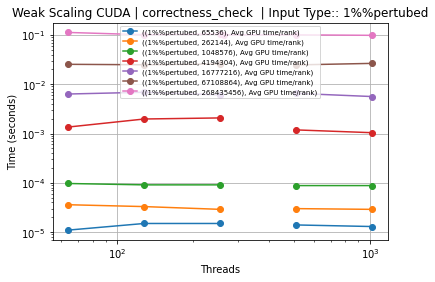

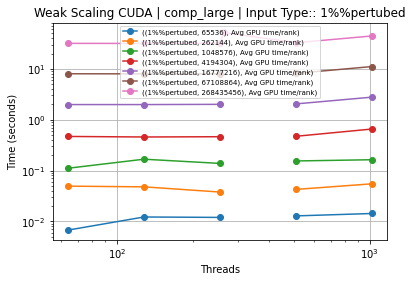

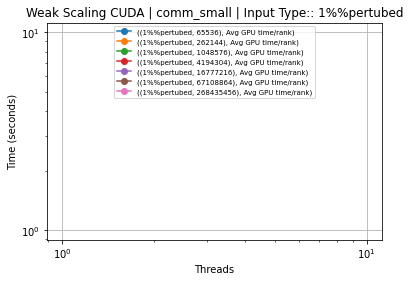

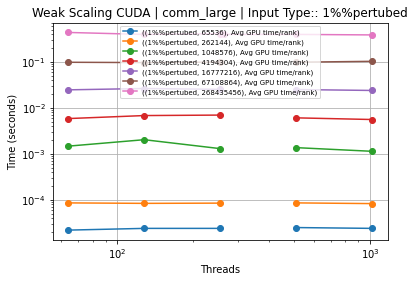

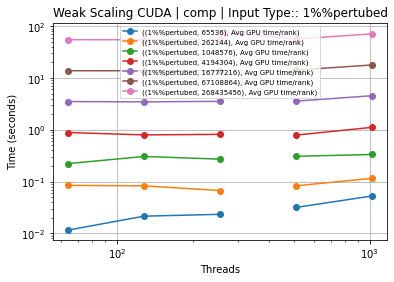

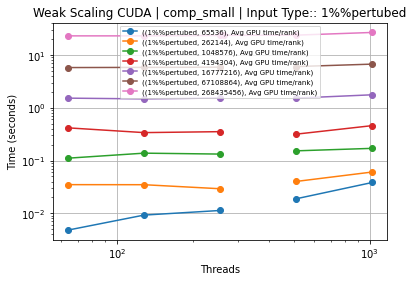

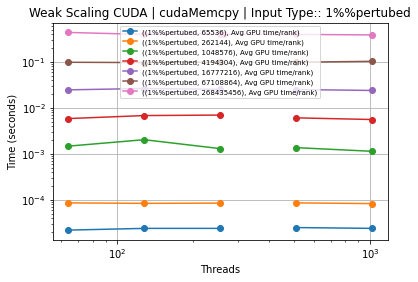

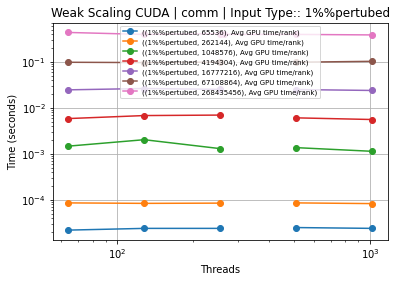

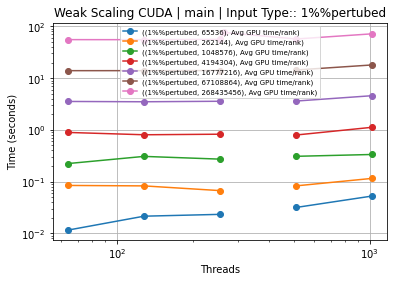

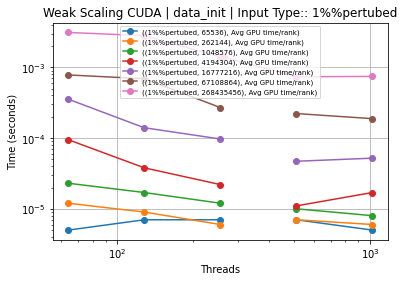

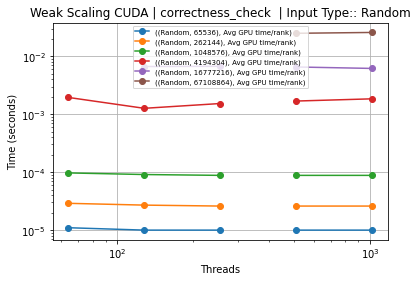

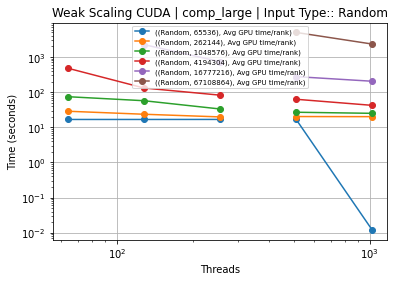

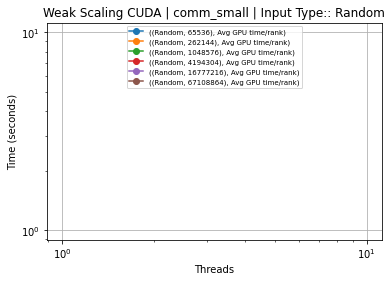

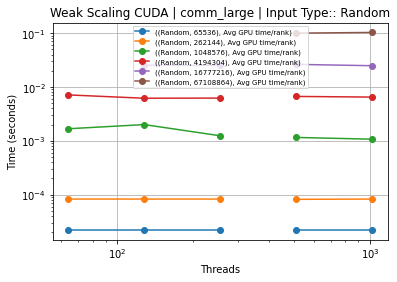

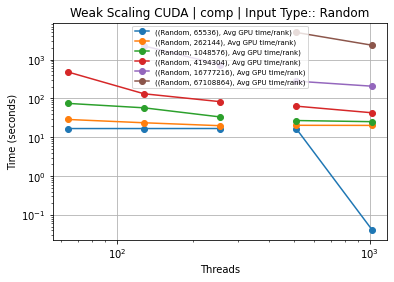

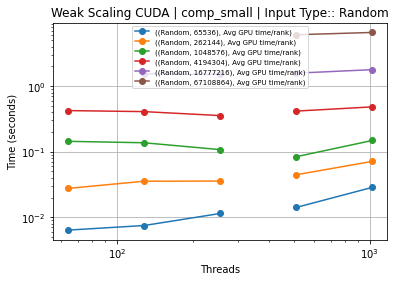

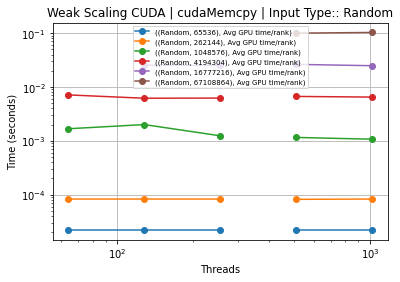

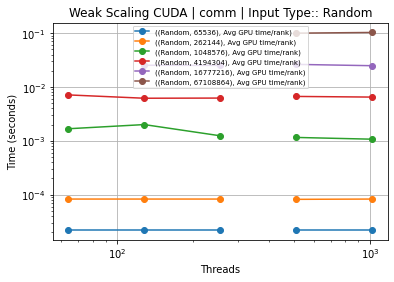

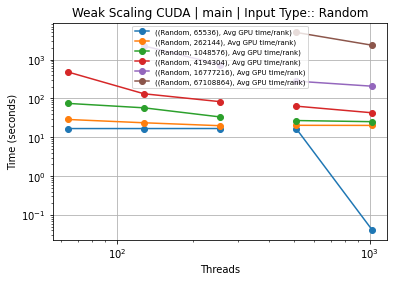

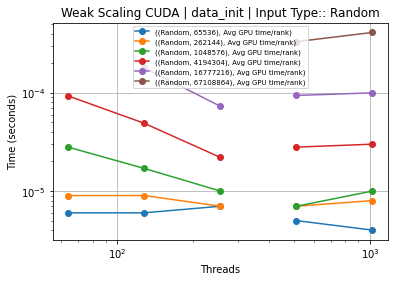

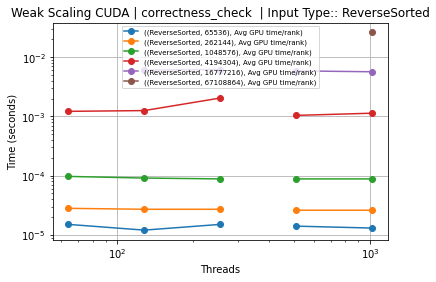

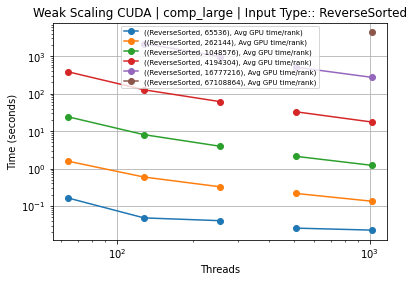

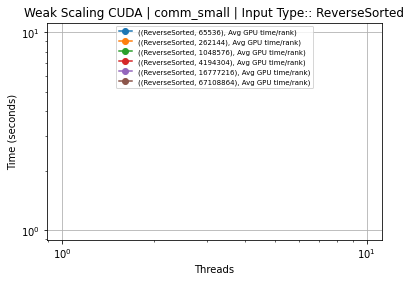

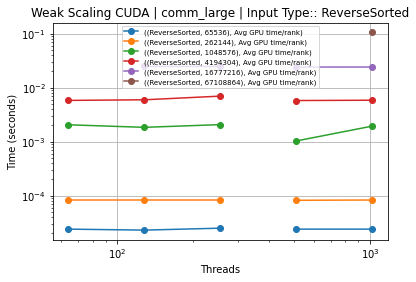

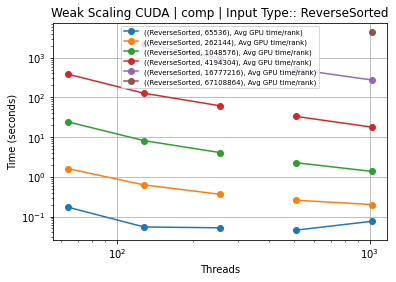

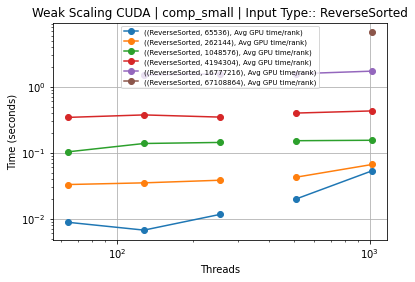

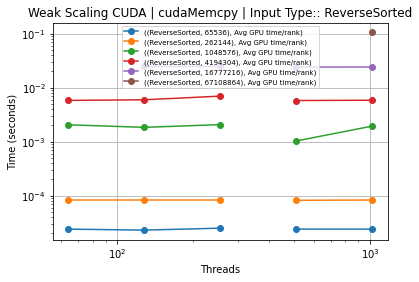

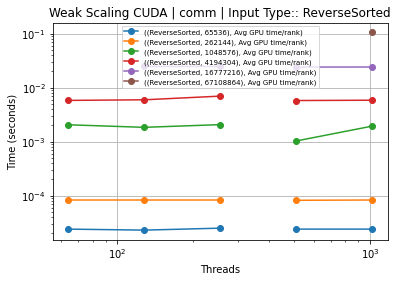

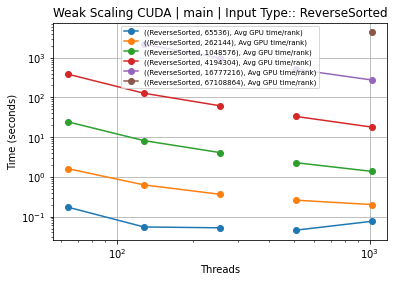

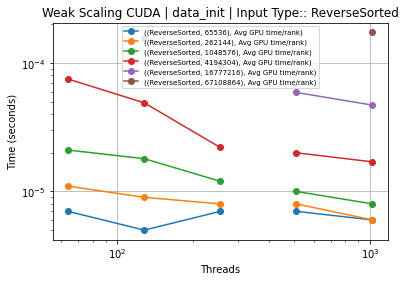

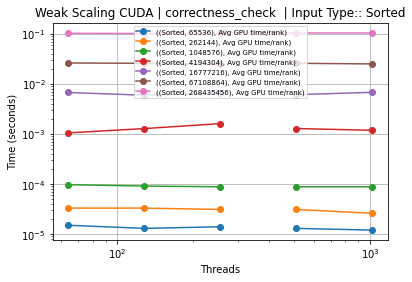

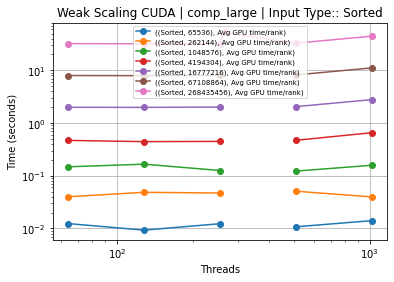

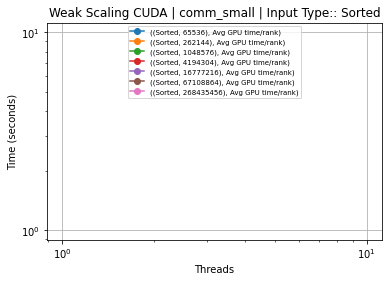

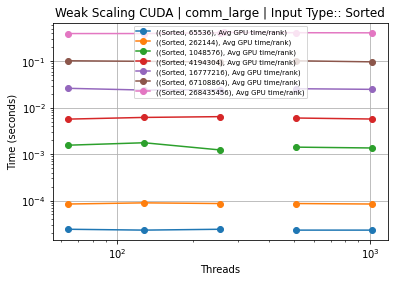

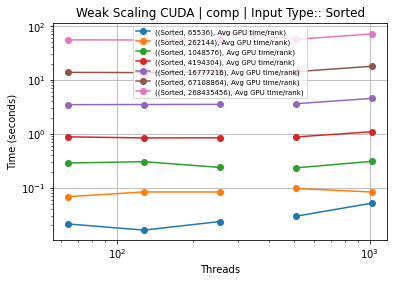

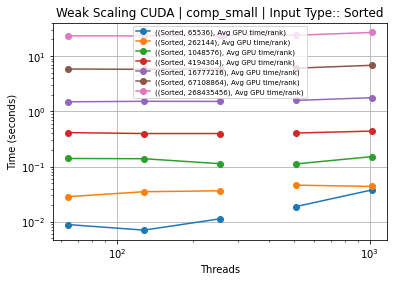

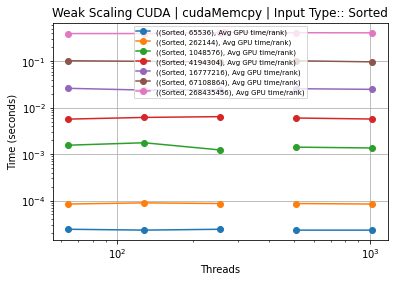

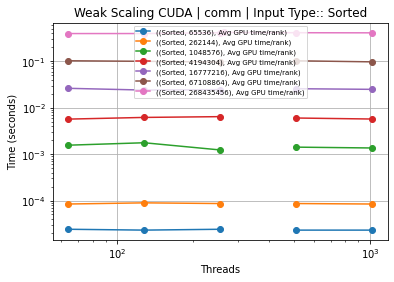

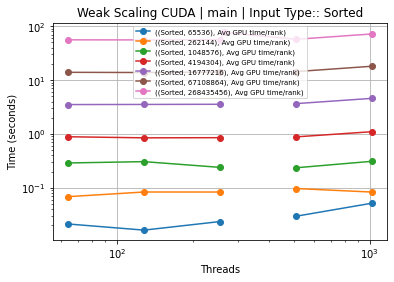

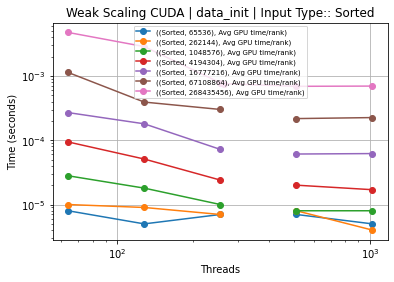

In [17]:
#Plotting Weak Scaling
for intype in inputtypes:
    cols = [(inputsize, "Avg GPU time/rank") for inputsize in ctk.dataframe.columns.get_level_values(0) if inputsize[0] == intype]
    test = ctk.dataframe[cols]
    for name in function_names:
        plot = plot_pandas(
            df=test.loc[name],
            title=f"Weak Scaling CUDA | {name} | Input Type:: {intype}",
            xlabel="Threads",
            ylabel="Time (seconds)",
            loglog=True
        )
        fig = plot.get_figure()
        fig.savefig(f"Weak_Scaling_CUDA_{name}_InputType::{intype}")

In [18]:
ctk.dataframe.columns.get_level_values(0)

Index([     ('1%%pertubed', 65536),     ('1%%pertubed', 262144),
          ('1%%pertubed', 1048576),    ('1%%pertubed', 4194304),
         ('1%%pertubed', 16777216),   ('1%%pertubed', 67108864),
        ('1%%pertubed', 268435456),           ('Random', 65536),
                ('Random', 262144),         ('Random', 1048576),
               ('Random', 4194304),        ('Random', 16777216),
              ('Random', 67108864),    ('ReverseSorted', 65536),
         ('ReverseSorted', 262144),  ('ReverseSorted', 1048576),
        ('ReverseSorted', 4194304), ('ReverseSorted', 16777216),
       ('ReverseSorted', 67108864),           ('Sorted', 65536),
                ('Sorted', 262144),         ('Sorted', 1048576),
               ('Sorted', 4194304),        ('Sorted', 16777216),
              ('Sorted', 67108864),       ('Sorted', 268435456)],
      dtype='object')